# Basic water mass analysis example notebook for MPAS-Ocean

Uses `watermasstools.py` in the `modules` directory.

***

In [1]:
import numpy as np
import xarray as xr
import yaml
import sys
import matplotlib.pyplot as plt

# Import modules from path
sys.path.append('../modules/')
import watermasstools as wmttools

# Set plot font sizes
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 'medium'})

In [ ]:
# Mask stuff

#regionList = ['Greenland Sea', 'Iceland Basin', 'Irminger Sea', 'Labrador Sea', 'Norwegian Sea']

# Load mask variables
#with xr.open_dataset(maskfile) as ds:
#    regionNames = ds.regionNames.values.astype(str)
#    regionMasks = ds.regionCellMasks

# Subdomain
#index = np.isin(regionNames, regionList)
#subdomain = regionMasks[:, index].sum(dim='nRegions').astype(bool)

In [2]:
# Paths
meshfile = '/global/cfs/cdirs/e3sm/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.210210.nc'
maskfile = '/pscratch/sd/b/bmoorema/maskfiles/EC30to60E2r2_NAmodewatermasks20230915.nc'
resultspath = '/pscratch/sd/l/lvroekel/LR/run_001_062/'
filename = '20210421_sim7_CORE_60to30E2r2.mpaso.hist.am.timeSeriesStatsMonthly.0001-01-01.nc'

In [3]:
# Load mesh variables
with xr.open_dataset(meshfile) as ds:
    areaCell = ds.areaCell
    #lonCell = np.rad2deg(ds.lonCell)
    #latCell = np.rad2deg(ds.latCell)
    #lonCell[lonCell > 180] = lonCell[lonCell > 180] - 360

# Load results
with xr.open_dataset(resultspath + filename) as ds:
    
    # Get S, T and statevars
    names, prefix = ['salinity', 'temperature'], 'timeMonthly_avg_activeTracers_'
    S, T = [ds[prefix + name][0, :, 0] for name in names]
    statevars = wmttools.calc_state_variables(S, T)
    
    # Get buoyancy fluxes
    fluxes = wmttools.build_combined_fluxes(ds, statevars)
    
    # Calculate water mass transformation
    wmt = wmttools.calc_wmt(fluxes, statevars['sigmaTheta'], areaCell)

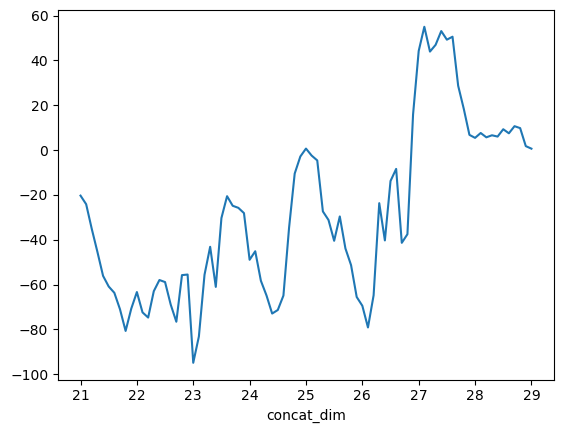

In [6]:
# Plot water mass transformation
wmt['totalTrans'].plot()